Step 1: Import Libraries

In [186]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


Step 2: Load Dataset

In [187]:
df = pd.read_csv('Iris.csv')

Step 3: Data Inspection

In [188]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [189]:
# delete a column
df = df.drop(columns = ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [190]:
# to display stats about data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [191]:
# to basic info about datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [192]:
# to display no. of samples on each class
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [193]:
# check for null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Step 4: Exploratory Data Analysis

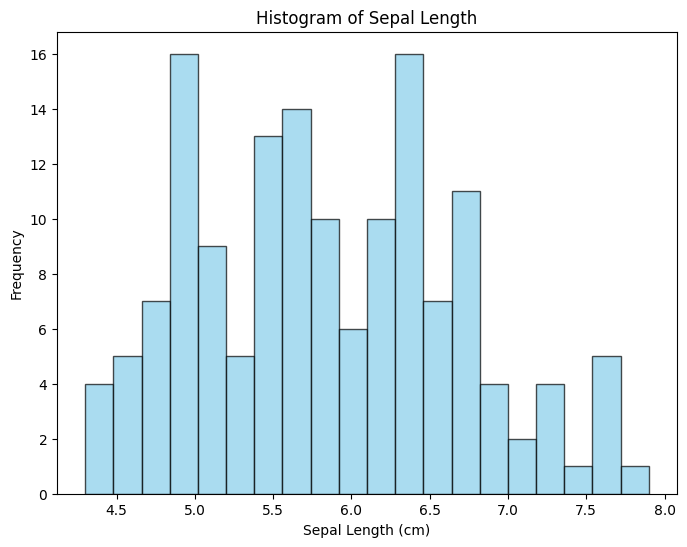

In [194]:
# Histogram for 'SepalLengthCm' with customized appearance
plt.figure(figsize=(8, 6))
df['SepalLengthCm'].hist(bins=20, color='skyblue', alpha=0.7, edgecolor='black')  # Adjust bins, color, transparency, and edge color
plt.title('Histogram of Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.grid(False)  # Turn off grid lines for better visibility
plt.show()


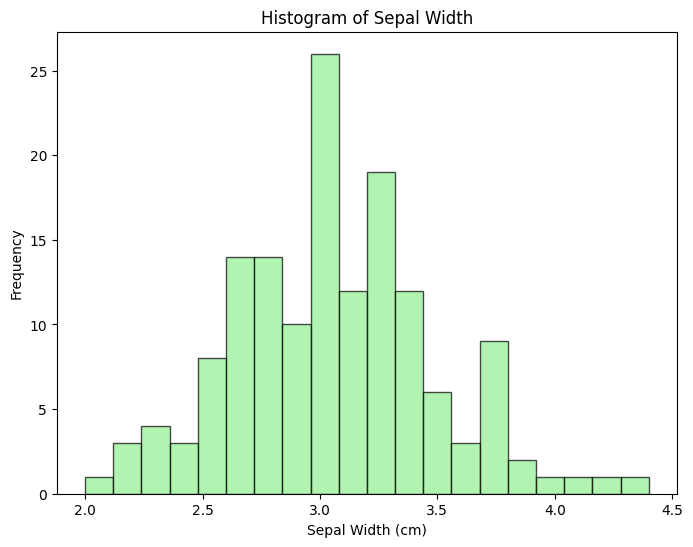

In [195]:
# Histogram for 'SepalWidthCm' with customized appearance
plt.figure(figsize=(8, 6))
df['SepalWidthCm'].hist(bins=20, color='lightgreen', alpha=0.7, edgecolor='black')  # Adjust bins, color, transparency, and edge color
plt.title('Histogram of Sepal Width')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Frequency')
plt.grid(False)  # Turn off grid lines for better visibility
plt.show()


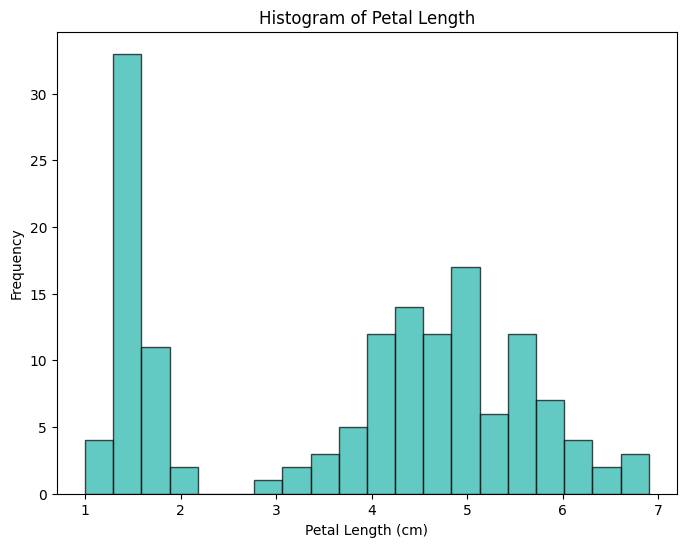

In [196]:
# Histogram for 'PetalLengthCm' with customized appearance
plt.figure(figsize=(8, 6))
df['PetalLengthCm'].hist(bins=20, color='lightseagreen', alpha=0.7, edgecolor='black')  # Adjust bins, color, transparency, and edge color
plt.title('Histogram of Petal Length')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')
plt.grid(False)  # Turn off grid lines for better visibility
plt.show()


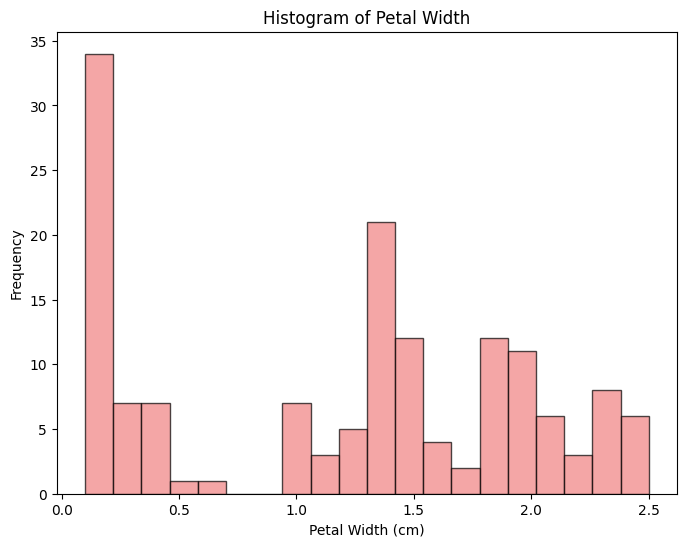

In [197]:
# Histogram for 'PetalWidthCm' with customized appearance
plt.figure(figsize=(8, 6))
df['PetalWidthCm'].hist(bins=20, color='lightcoral', alpha=0.7, edgecolor='black')  # Adjust bins, color, transparency, and edge color
plt.title('Histogram of Petal Width')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Frequency')
plt.grid(False)  # Turn off grid lines for better visibility
plt.show()



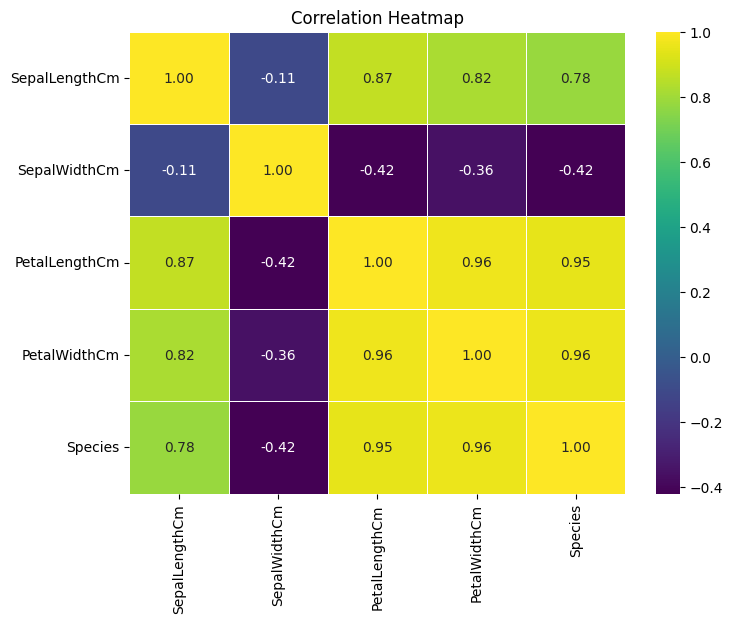

In [198]:
# Calculate the correlation matrix
df['Species'] = df['Species'].astype('category').cat.codes
corr = df.corr()

# Create a figure and axis with specified size
plt.figure(figsize=(8, 6))

# Plot the correlation heatmap with a different color palette
sns.heatmap(corr, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)

# Add title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()


In [199]:
# Data Preprocessing
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
scaler = StandardScaler()
X = df.drop(columns=['Species'])
Y = df['Species']
X_scaled = scaler.fit_transform(X)


 Step 5: Models Training

Model Training - Random Forest with Hyperparameter Tuning

In [200]:
# Random Forest with Hyperparameter Tuning
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
cv_rf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid_rf, cv=cv_rf, scoring='accuracy')
grid_search_rf.fit(X_scaled, Y)
best_model_rf = grid_search_rf.best_estimator_


Model Training - Gradient Boosting with Hyperparameter Tuning

In [201]:
# Gradient Boosting with Hyperparameter Tuning
param_grid_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7]
}
grid_search_gb = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42), param_grid=param_grid_gb, cv=cv_rf, scoring='accuracy')
grid_search_gb.fit(X_scaled, Y)
best_model_gb = grid_search_gb.best_estimator_


Model Training - Support Vector Machine with Hyperparameter Tuning

In [202]:
# Support Vector Machine with Hyperparameter Tuning
param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}
grid_search_svm = GridSearchCV(estimator=SVC(probability=True, random_state=42), param_grid=param_grid_svm, cv=cv_rf, scoring='accuracy')
grid_search_svm.fit(X_scaled, Y)
best_model_svm = grid_search_svm.best_estimator_


Model Training - XGBoost with Hyperparameter Tuning

In [203]:
# XGBoost with Hyperparameter Tuning
param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7]
}
grid_search_xgb = GridSearchCV(estimator=XGBClassifier(random_state=42), param_grid=param_grid_xgb, cv=cv_rf, scoring='accuracy')
grid_search_xgb.fit(X_scaled, Y)
best_model_xgb = grid_search_xgb.best_estimator_


Model Training - LightGBM with Hyperparameter Tuning

In [204]:
# LightGBM with Hyperparameter Tuning
param_grid_lgbm = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7]
}
grid_search_lgbm = GridSearchCV(estimator=LGBMClassifier(random_state=42), param_grid=param_grid_lgbm, cv=cv_rf, scoring='accuracy')
grid_search_lgbm.fit(X_scaled, Y)
best_model_lgbm = grid_search_lgbm.best_estimator_


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

Model Training - K-Nearest Neighbors with Hyperparameter Tuning

In [205]:
# K-Nearest Neighbors with Hyperparameter Tuning
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
grid_search_knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid_knn, cv=cv_rf, scoring='accuracy')
grid_search_knn.fit(X_scaled, Y)
best_model_knn = grid_search_knn.best_estimator_


Model Stacking

In [206]:
# Create the stacking classifier
stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Fit the stacking classifier
stacking_classifier.fit(X_scaled, Y)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000027 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 98
[LightGBM] [Info] Number of data points in the train set: 150, number of used features: 4
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(max_depth=3,
                                                       random_state=42)),
                               ('gb',
                                GradientBoostingClassifier(learning_rate=1,
                                                           n_estimators=50,
                                                           random_state=42)),
                               ('svm',
                                SVC(C=10, gamma=0.01, kernel='linear',
                                    probability=True, random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_b...
                                              max_delta_step=None, max_depth=3,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=150, n_jobs=None,
                                              num_parallel_tree=None,
                                              objective='multi:softprob', ...)),
                               ('lgbm',
                                LGBMClassifier(max_depth=5, n_estimators=50,
                                               random_state=42)),
                               ('knn', KNeighborsClassifier())],
                   final_estimator=LogisticRegression())

Step 6: Model Evaluation - Accuracy, Precision, Recall, and F1 Score

In [207]:
# Model Evaluation - Accuracy, Precision, Recall, and F1 Score
models = ['Random Forest', 'Gradient Boosting', 'Support Vector Machine', 'XGBoost', 'LightGBM', 'K-Nearest Neighbors', 'Stacking']
best_models = [best_model_rf, best_model_gb, best_model_svm, best_model_xgb, best_model_lgbm, best_model_knn, stacking_classifier]

for model, best_model in zip(models, best_models):
    y_pred = best_model.predict(X_scaled)
    accuracy = accuracy_score(Y, y_pred)
    precision = precision_score(Y, y_pred, average='macro')
    recall = recall_score(Y, y_pred, average='macro')
    f1 = f1_score(Y, y_pred, average='macro')
    print(f"Model: {model}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print()


Model: Random Forest
Accuracy: 0.9666666666666667
Precision: 0.9667867146858743
Recall: 0.9666666666666667
F1 Score: 0.9666633329999667

Model: Gradient Boosting
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Model: Support Vector Machine
Accuracy: 0.9733333333333334
Precision: 0.9738247863247862
Recall: 0.9733333333333333
F1 Score: 0.9733226623982927

Model: XGBoost
Accuracy: 0.9733333333333334
Precision: 0.9738247863247862
Recall: 0.9733333333333333
F1 Score: 0.9733226623982927

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Model: LightGBM
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Model: K-Nearest Neighbors
Accuracy: 0.9533333333333334
Precision: 0.9534480458850206
Recall: 0.9533333333333333
F1 Score: 0.9533286661999533

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Model: Stacking
Accuracy: 0.98

Step 7: Model Comparison - Accuracy Visualization

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


<ipython-input-208-03816cb01667>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accuracies, y=models, palette='viridis')


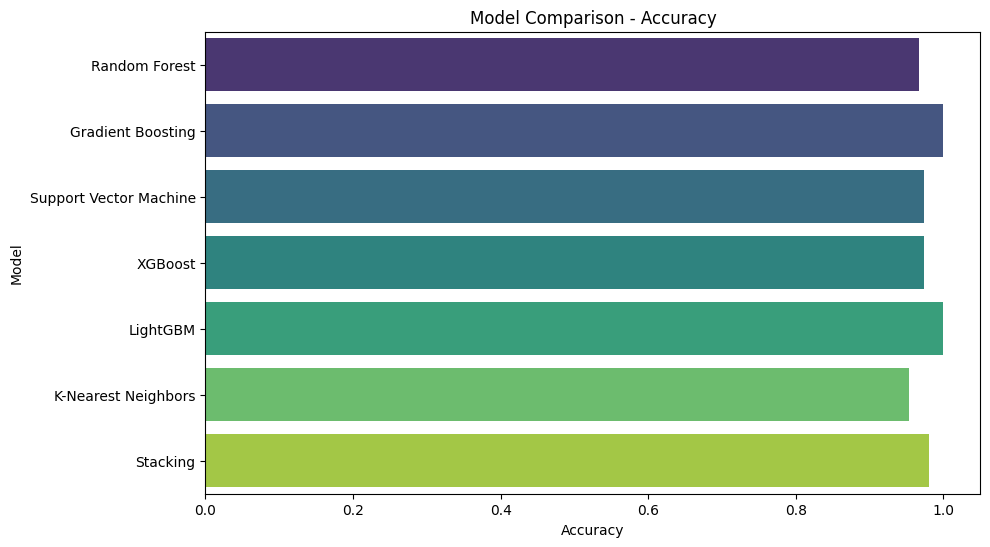

In [208]:
# Model Comparison - Accuracy Visualization
accuracies = [best_model_rf.score(X_scaled, Y), best_model_gb.score(X_scaled, Y), best_model_svm.score(X_scaled, Y),
              best_model_xgb.score(X_scaled, Y), best_model_lgbm.score(X_scaled, Y), best_model_knn.score(X_scaled, Y),
              stacking_classifier.score(X_scaled, Y)]

plt.figure(figsize=(10, 6))
sns.barplot(x=accuracies, y=models, palette='viridis')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Model Comparison - Accuracy')
plt.show()